<a href="https://colab.research.google.com/github/bijbhi/Data-Science/blob/main/Rocket_Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Data importing libraries
import pandas as pd 
import numpy as np
from collections import OrderedDict

#data preprocessing libraries

from sklearn.preprocessing import LabelEncoder

#data visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

#statatical libraries
import scipy.stats as sc

#model building train test split
from sklearn.model_selection import train_test_split

#deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [3]:
from google.colab import files
uploaded = files.upload()

Saving Rocket_Loans.xlsx to Rocket_Loans.xlsx


In [4]:
df = pd.read_excel("Rocket_Loans.xlsx")
df.drop("Loan_ID",axis=1,inplace=True)

In [5]:
df.head()

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,Male,33,No,0,Graduate,No,5849,0.0,108.0,360.0,1.0,Urban,Y
1,Male,34,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,31,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,33,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,48,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [7]:
df.groupby('Loan_Status').describe()

Age                                   ... Credit_Score                    
             count       mean       std   min   25%  ...          min  25%  50%  75%  max
Loan_Status                                          ...                                 
N            192.0  37.734375  8.088986  25.0  31.0  ...          0.0  0.0  1.0  1.0  1.0
Y            422.0  38.803318  8.128522  25.0  32.0  ...          0.0  1.0  1.0  1.0  1.0

[2 rows x 48 columns]

In [79]:
df['Loan_Status'].groupby(df['Credit_Score']).count()

Credit_Score
0.000000     89
0.842199     50
1.000000    475
Name: Loan_Status, dtype: int64

In [82]:
df_loan_status = pd.crosstab(df['Loan_Status'], df['Credit_Score'])
df_loan_status

Credit_Score,0.000000,0.842199,1.000000
Loan_Status,,,
0,82,13,97
1,7,37,378


In [42]:
df1 = df.Loan_Status.value_counts().reset_index(name='Frequency').rename(columns={'index':("Total Income = Loan_bearer_income + Loan_Cobearer_income")})

In [49]:
df["Total_Income"] = df["Loan_Bearer_Income"] + df["Loan_Cobearer_Income"]

In [50]:
df.head()

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status,Total_Income
0,1,33,0,0.0,0,0,5849,0.0,108.0,360.0,1.0,2,1,5849.0
1,1,34,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,31,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,33,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,48,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


In [8]:
df.isna().sum()

Sex                            13
Age                             0
Married                         3
No. of People in the Family    15
Qualification                   0
Self_Employed                  32
Loan_Bearer_Income              0
Loan_Cobearer_Income            0
Amount Disbursed               21
Loan_Tenure                    14
Credit_Score                   50
Location_type                   0
Loan_Status                     0
dtype: int64

In [9]:
df["No. of People in the Family"] = df["No. of People in the Family"].replace("3+","3")

In [10]:
df["No. of People in the Family"]=pd.to_numeric(df["No. of People in the Family"])

In [11]:
df["No. of People in the Family"]= df["No. of People in the Family"].fillna(df["No. of People in the Family"].mode()[0])

In [12]:
df["Sex"]=df["Sex"].fillna(df["Sex"].mode()[0])

In [13]:
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])

In [14]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [15]:
df['Credit_Score']=df['Credit_Score'].fillna(df['Credit_Score'].mean())

In [16]:
df['Loan_Tenure']=df['Loan_Tenure'].fillna(df['Loan_Tenure'].mean())

In [17]:
df['Amount Disbursed']=df['Amount Disbursed'].fillna(df['Amount Disbursed'].mean())

In [18]:
def Labelencoding(df):
    for col in df.columns:
        if df[col].dtype == object:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    return df

In [19]:
Labelencoding(df)

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,1,33,0,0.0,0,0,5849,0.0,108.0,360.0,1.0,2,1
1,1,34,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,31,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,33,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,48,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,28,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,33,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,39,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,47,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [52]:
df1 = df.drop(["Loan_Bearer_Income","Loan_Cobearer_Income"],axis=1)

In [53]:
df1.head()

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status,Total_Income
0,1,33,0,0.0,0,0,108.0,360.0,1.0,2,1,5849.0
1,1,34,1,1.0,0,0,128.0,360.0,1.0,0,0,6091.0
2,1,31,1,0.0,0,1,66.0,360.0,1.0,2,1,3000.0
3,1,33,1,0.0,1,0,120.0,360.0,1.0,2,1,4941.0
4,1,48,0,0.0,0,0,141.0,360.0,1.0,2,1,6000.0


In [21]:
#Custome Summary function

def custome_summary(df):

  result=[]
  for col in list(df.columns):

    stats = OrderedDict({'feature_name':col,
                         'count':df[col].count(),
                         'datatype':df[col].dtype,
                         'min':df[col].min(),
                         'Q1':df[col].quantile(0.25),
                         'Q2':df[col].quantile(0.5),
                         'Q3':df[col].quantile(0.75),
                         'Q4':df[col].quantile(1),
                         'Median':df[col].median(),
                         'Mean':df[col].mean(),
                         'stdv':df[col].std(),
                         'variance':df[col].var(),
                         'skew':df[col].skew(),
                         'kurt':df[col].kurt(),
                         'IQR':df[col].quantile(0.75)-df[col].quantile(0.25),
                         'Range':df[col].max()-df[col].min()})
    # Checking skewness of the data

    if df[col].skew()<-1.0:
      label="Highly negatively skewed"
    elif -1.0 <df[col].skew()<-0.5:
      label="Moderately negatively skewed"
    elif -0.5<df[col].skew()<0.5:
      label="fairly symmetric"
    elif 0.5<df[col].skew()<1.0:
      label="moderately positively skewed"
    else:
      lable="Highly positively skewed"
    
    stats["skewness comment"]=label;

    #Outliers detection

    upper_limit = stats['Q3']+(1.5*stats["IQR"])
    lower_limit = stats['Q1']-(1.5*stats["IQR"])
    if len([x for x in df[col] if x<lower_limit or x>upper_limit]) >0:
      outliers_lable="Has outliers"
    else:
      outliers_lable="Has no outliers"

    stats["Outliers comment"]= outliers_lable
    stats["outliers count"]= len([x for x in df[col] if x<lower_limit or x>upper_limit])

    #Calculating the outliers percentage
        
    stats['Percentage of outliers'] = stats['outliers count']*100/stats['count']

    result.append(stats)
  resultdf=pd.DataFrame(data=result)
  return resultdf


                         

In [54]:
custome_summary(df1)

,feature_name,count,datatype,min,Q1,Q2,Q3,Q4,Median,Mean,stdv,variance,skew,kurt,IQR,Range,skewness comment,Outliers comment,outliers count,Percentage of outliers
0,Sex,614,int64,1.0,1.00,1.0,1.00,1.0,1.0,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00,0.0,fairly symmetric,Has no outliers,0,0.000000
1,Age,614,int64,25.0,32.00,39.0,45.00,52.0,39.0,38.469055,8.124732,6.601128e+01,-0.014020,-1.163663,13.00,27.0,fairly symmetric,Has no outliers,0,0.000000
2,Married,614,int64,0.0,0.00,1.0,1.00,1.0,1.0,0.653094,0.476373,2.269317e-01,-0.644850,-1.589356,1.00,1.0,Moderately negatively skewed,Has no outliers,0,0.000000
3,No. of People in the Family,614,float64,0.0,0.00,0.0,1.00,3.0,0.0,0.744300,1.009623,1.019339e+00,1.015551,-0.347376,1.00,3.0,Moderately negatively skewed,Has outliers,51,8.306189
4,Qualification,614,int64,0.0,0.00,0.0,0.00,1.0,0.0,0.218241,0.413389,1.708902e-01,1.367622,-0.130044,0.00,1.0,Moderately negatively skewed,Has outliers,134,21.824104
5,Self_Employed,614,int64,0.0,0.00,0.0,0.00,1.0,0.0,0.133550,0.340446,1.159035e-01,2.159796,2.673417,0.00,1.0,Moderately negatively skewed,Has outliers,82,13.355049
6,Amount Disbursed,614,float64,9.0,100.25,128.5,164.75,700.0,128.5,146.347386,84.051763,7.064699e+03,2.727373,10.895526,64.50,691.0,Moderately negatively skewed,Has outliers,41,6.677524
7,Loan_Tenure,614,float64,12.0,360.00,360.0,360.00,480.0,360.0,342.000000,64.372489,4.143817e+03,-2.389680,6.897995,0.00,468.0,Highly negatively skewed,Has outliers,102,16.612378
8,Credit_Score,614,float64,0.0,1.00,1.0,1.00,1.0,1.0,0.842199,0.349681,1.222768e-01,-1.963600,1.951159,0.00,1.0,Highly negatively skewed,Has outliers,139,22.638436
9,Location_type,614,int64,0.0,0.00,1.0,2.00,2.0,1.0,1.037459,0.787482,6.201280e-01,-0.066196,-1.383653,2.00,2.0,fairly symmetric,Has no outliers,0,0.000000


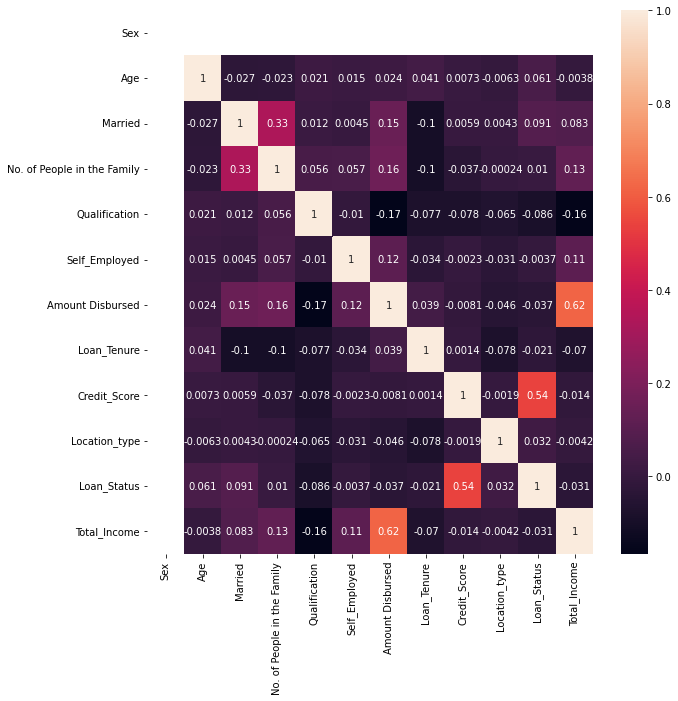

In [70]:
corr = df1.corr()

fig = plt.subplots(figsize =(10,10))
sns.heatmap(corr,annot=True)

In [24]:
#treating outliers
def otf(data,col,method ='Quartile',strategy ='Median'):
  coldata=data[col]
  
  #using quartile method to identify outliers
  if method =="Quartile":
    median=coldata.median()
    Q1=coldata.quantile(0.25)
    Q3=coldata.quantile(0.75)
    IQR= Q3 - Q1

    upper_limit= Q3 + (1.5 * IQR)
    lower_limit= Q1 - (1.5 * IQR)

  #using std deviation metho to identify outliers
  elif method== "std":
      colmean= coldata.mean()
      colstd= coldata.std()

      upper_limit=colmean + (2 * colstd)
      lower_limit=colmean - (2 * colstd)

  else:
    print("invalid method")

  #identify the outliers
  outlier = data.loc[(coldata < lower_limit) | (coldata > upper_limit),col]
  outlier_percentage = round(len(outlier) * 100 / len(data),2)

  if len(outlier)==0:
    print(f"{col} doesn't have any outlier")
  else:
    print(f"Total number of outliers in {col} is {len(outlier)}")
    print(f"Outlier percentage in {col} is {outlier_percentage}")

  #using median amd mean strategy to replace outliers
  if strategy == "Median":
    data.loc[(coldata < lower_limit) | (coldata > upper_limit), col] = median
  elif strategy == "Mean":
    data.loc[(coldata < lower_limit) | (coldata > upper_limit),col] = colmean
  return data







In [25]:
#Treating the outliers using outlier tretment function

def otf(data, col, method = 'Quartile', strategy= 'Median'):
    coldata = data[col]
    
    #Using Quartile method to identify the outliers
    if method == 'Quartile':
        median = coldata.median()
        Q1 = coldata.quantile(0.25)
        Q3 = coldata.quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + (1.5*IQR)
        lower_limit = Q1 - (1.5*IQR)
        
    #Using Standard deviation method to identify the outliers    
    elif method == 'std':
        colmean = coldata.mean()
        colstd = coldata.std()
        upper_limit = colmean + (2*colstd)
        lower_limit = colmean - (2*colstd)
        
    else:
        print('Invalid method')
             
    #Identifying the outliers        
    outlier = data.loc[(coldata < lower_limit) | (coldata > upper_limit), col]
    
    #Calculating outlier percentage
    outlier_percentage = round(len(outlier)*100/len(data), 2)
    
    
    if len(outlier) == 0:
        print(f"{col} doesn't have any outliers")
    else:
        print(f"Total number of outliers in {col} is {len(outlier)}")
        print(f'Percentage of outliers in {col} data is {outlier_percentage}')
    
    #Using median and mean strategy to replace outliers
    if strategy == 'Median':
        data.loc[(coldata < lower_limit) | (coldata > upper_limit), col] = median
    elif strategy == "Mean":
        data.loc[(coldata < lower_limit) | (coldata > upper_limit), col] = colmean
    return data

In [26]:
def odtplots(df,col):
  fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,5))

  kwargs={'fontsize':15,'color':'black'}  

  #boxplot with outliers
  sns.boxplot(df[col],ax=ax1,color='b')
  ax1.set_title('Box plot for'+col, **kwargs)
  ax1.set_xlabel('values',**kwargs)
  ax1.set_ylabel('Box distribution', **kwargs)
  
  #Histogram with outliers
  sns.distplot(df[col],ax=ax2,color='r',fit=sc.norm)
  ax2.set_title('Histogram plot with outliers for'+col,**kwargs)
  ax2.set_xlabel('values',**kwargs)
  ax2.set_ylabel('Histogram',**kwargs)

  #Histogram with no outliers
  y=otf(df,col)
  sns.distplot(df[col],ax=ax3,color='y',fit=sc.norm)
  ax3.set_title('Histogram plot without outliers for'+col,**kwargs)
  ax3.set_xlabel('values',**kwargs)
  ax3.set_ylabel('Histogram',**kwargs)

  plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


LinAlgError: ignored

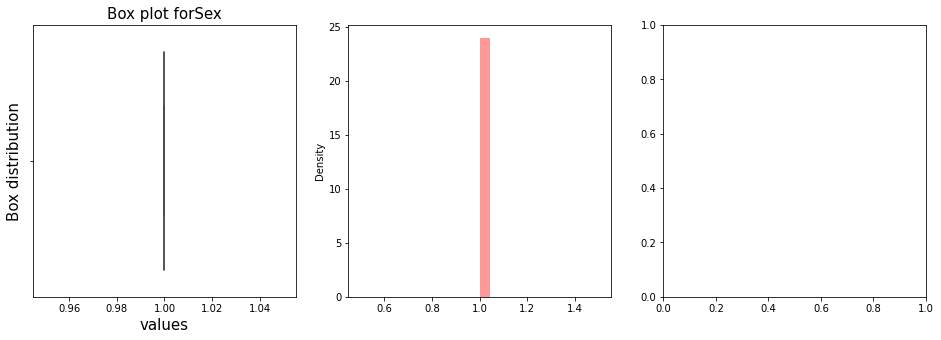

In [56]:
for col in df.columns:
  odtplots(df1,col)

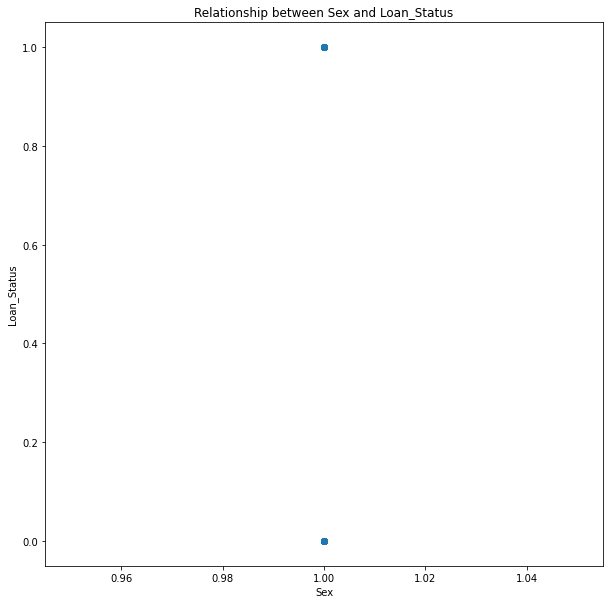

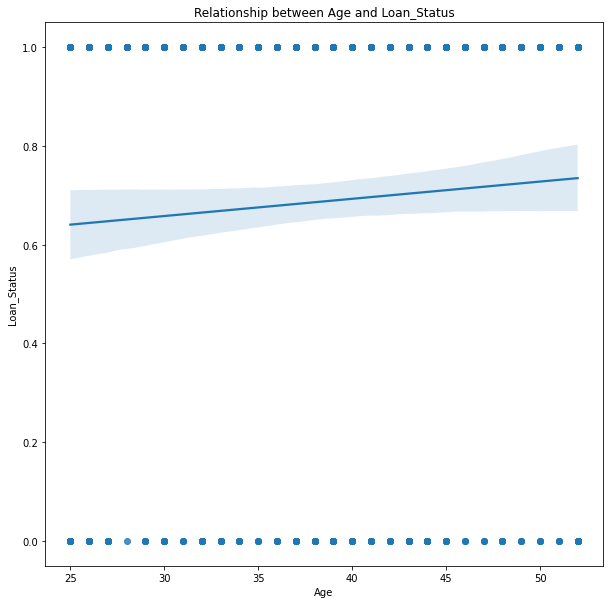

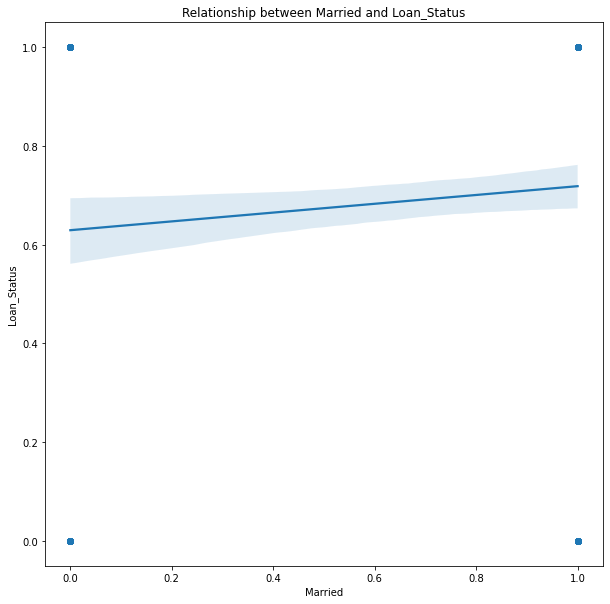

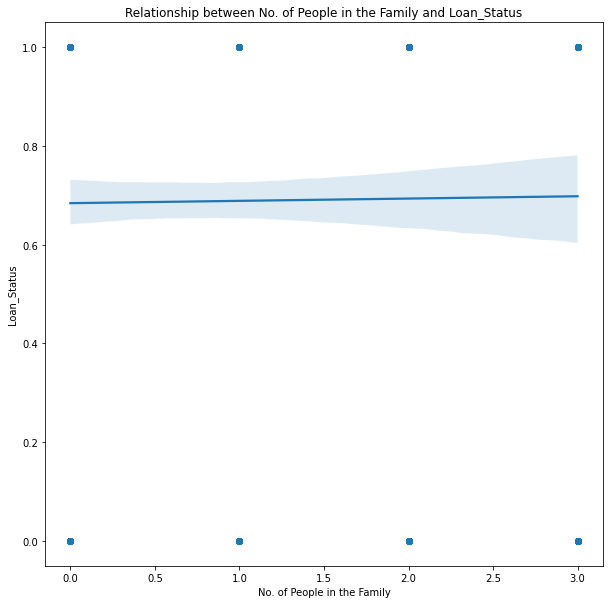

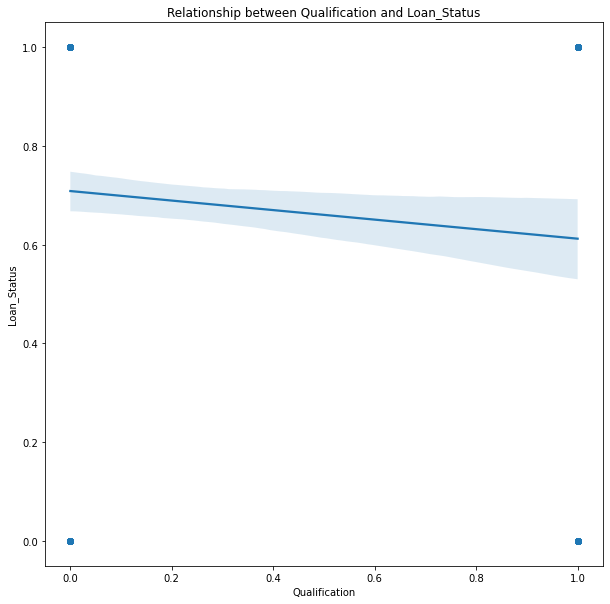

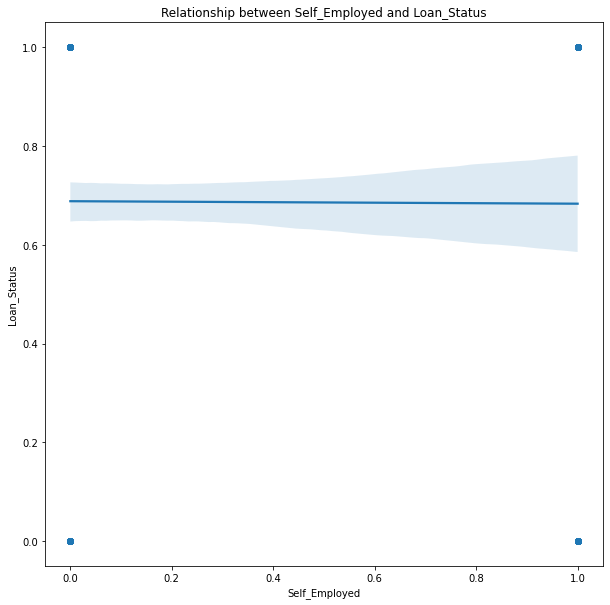

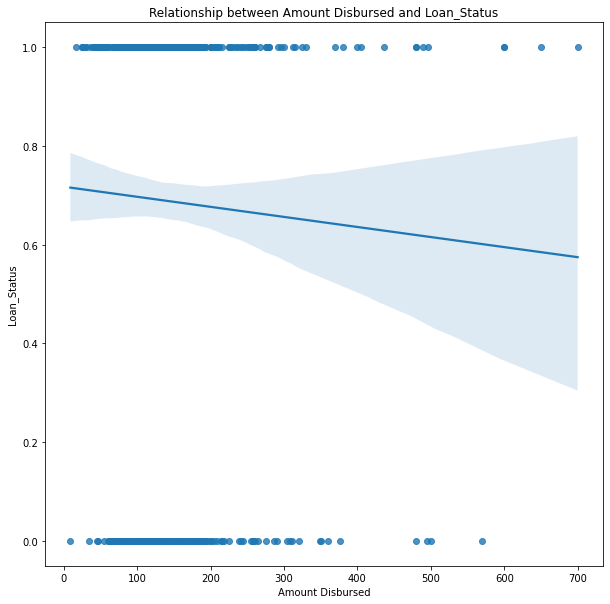

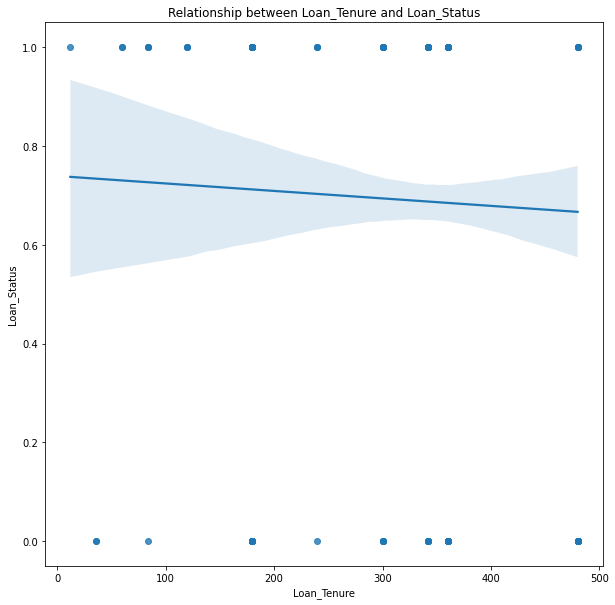

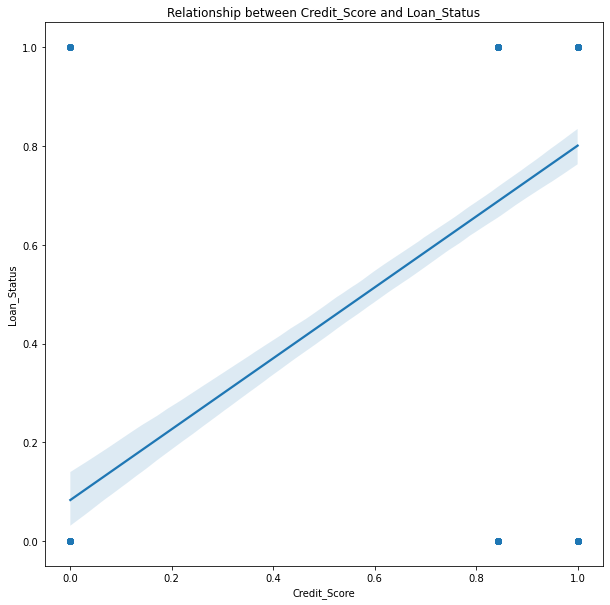

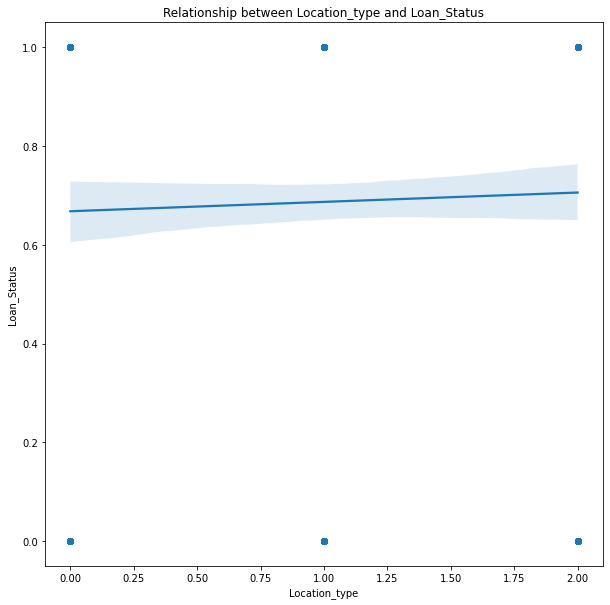

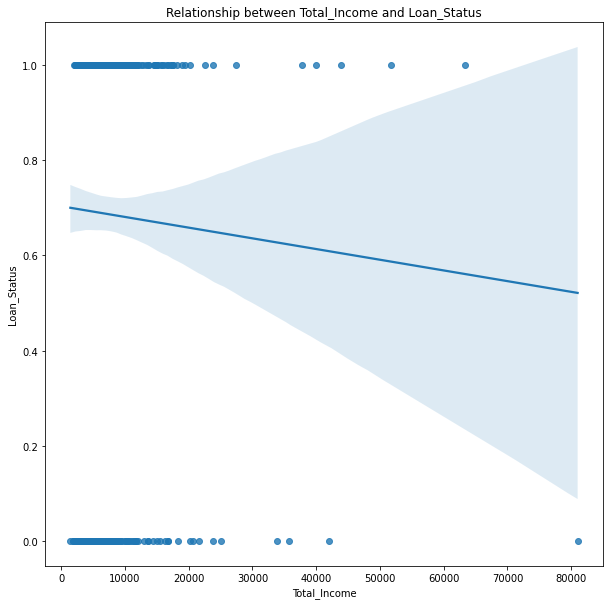

In [57]:
#Finding the relationship between the dependent and the independent variables (Correlation) (with regression plots)
for col in list(df1.columns):
    if col != 'Loan_Status':
        f,ax1 = plt.subplots(figsize = (10,10))
        sns.regplot(x = df1[col], y=df1['Loan_Status'], ax=ax1).set_title(f'Relationship between {col} and Loan_Status')

In [58]:
x= df1.drop(["Loan_Status"],axis=1)

In [59]:
y=df1[["Loan_Status"]]

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [61]:
x_train.shape

(491, 11)

In [62]:
y_train.shape

(491, 1)

Building the ANN architecture

In [63]:
model = Sequential([Dense(689, activation = "tanh", input_shape = (11,)),
                    Dense(256, activation = "relu"),
                    Dense(128, activation = "tanh"),
                    Dense(64, activation = "tanh"),
                    Dense(1,activation = "sigmoid")])

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 689)               8268      
                                                                 
 dense_6 (Dense)             (None, 256)               176640    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 226,125
Trainable params: 226,125
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(optimizer="Adam",loss= 'binary_crossentropy', metrics= ["accuracy"]) 

In [66]:
history = model.fit(x_train,y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))

Epoch 1/10
5/5 [==============================] - 1s 66ms/step - loss: 0.8234 - accuracy: 0.5234 - val_loss: 0.6467 - val_accuracy: 0.6504
Epoch 2/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6339 - accuracy: 0.6965 - val_loss: 0.6714 - val_accuracy: 0.6504
Epoch 3/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6240 - accuracy: 0.6965 - val_loss: 0.6483 - val_accuracy: 0.6504
Epoch 4/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6190 - accuracy: 0.6965 - val_loss: 0.6618 - val_accuracy: 0.6504
Epoch 5/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6187 - accuracy: 0.6965 - val_loss: 0.6618 - val_accuracy: 0.6504
Epoch 6/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6160 - accuracy: 0.6965 - val_loss: 0.6470 - val_accuracy: 0.6504
Epoch 7/10
5/5 [==============================] - 0s 16ms/step - loss: 0.6159 - accuracy: 0.6965 - val_loss: 0.6491 - val_accuracy: 0.6504
Epoch 8/10
5/5 [===========

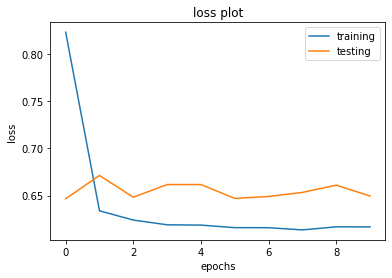

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss plot')
plt.legend(['training', 'testing'])

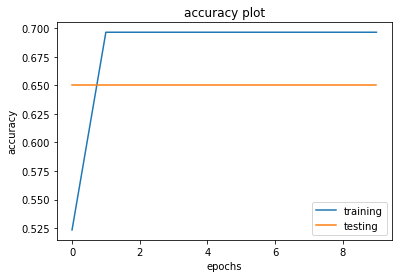

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy plot')
plt.legend(['training', 'testing'])